# MNIST Handwritten Digit Classification

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# Convert mnist image files into a four dimensional tensor (# of images, height, width, colour channel)
transform = transforms.ToTensor()

In [29]:
# Train Data
train_data = datasets.MNIST(root='mnist', train=True, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



In [31]:
# Test Data
test_data = datasets.MNIST(root='mnist', train=False, download=True, transform=transform)

In [33]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: mnist
    Split: Train
    StandardTransform
Transform: ToTensor()

In [34]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: mnist
    Split: Test
    StandardTransform
Transform: ToTensor()

In [35]:
# Create a small batch size for images
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(train_data, batch_size=10, shuffle=False)

In [36]:
# Model class
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Convolutional layers
        self.conv_l1 = nn.Conv2d(1, 6, 3, 1)
        self.conv_l2 = nn.Conv2d(6, 16, 3, 1)
        # Fully-connected layers
        self.fc1 = nn.Linear(5 * 5 * 16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, X):
        # first convolutional layer
        X = F.relu(self.conv_l1(X))
        X = F.max_pool2d(X, 2, 2) # 2x2 kernal and stride 2
        # second convolutional layer
        X = F.relu(self.conv_l2(X))
        X = F.max_pool2d(X, 2, 2) # 2x2 kernal and stride 2
        # Re-view to flatten it out
        X = X.view(-1, 16 * 5 * 5)
        # fully connected layers
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [37]:
# create an instance of our CNN model
torch.manual_seed(60)
model = CNN()
model

CNN(
  (conv_l1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv_l2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [48]:
# Loss function optimiser
criterion = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(), lr=0.001)

In [49]:
import time
start_time = time.time()

# Create variables for tracking
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# Loop of epochs
for i in range(epochs):
    trn_corr, tst_corr = 0, 0
    # Train
    for batch, (X_train, y_train) in enumerate(train_loader):
        batch += 1 # start batches at 1
        y_pred = model(X_train) # get predicted values from the training set
        loss = criterion(y_pred, y_train)
        predicted = torch.max(y_pred.data, 1)[1] # add up the number of correct predictions. Indexed off the first point
        batch_corr = (predicted == y_train).sum() # no. of correct predictions from this batch
        trn_corr += batch_corr
        
        # Update parameters
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        
        # Print out some results
        if batch % 600 == 0:
            print(f"Epoch: {i + 1}  Batch: {batch}  Loss: {loss.item()}")
    
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    # Test
    with torch.no_grad(): # No gradient so we don't update weights and biases with test set
        for batch, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test)
            predicted = torch.max(y_val.data, 1)[1] # Adding up correct predictions
            tst_corr += (predicted == y_test).sum()
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

current_time = time.time()
total = current_time - start_time
print(f"Training took: {total / 60} minutes in total")

Epoch: 1  Batch: 600  Loss: 0.0007834103889763355
Epoch: 1  Batch: 1200  Loss: 0.00043933303095400333
Epoch: 1  Batch: 1800  Loss: 5.578666605288163e-05
Epoch: 1  Batch: 2400  Loss: 2.279042746522464e-05
Epoch: 1  Batch: 3000  Loss: 0.05093545839190483
Epoch: 1  Batch: 3600  Loss: 1.661665919527877e-05
Epoch: 1  Batch: 4200  Loss: 0.00018847701721824706
Epoch: 1  Batch: 4800  Loss: 0.0020607165060937405
Epoch: 1  Batch: 5400  Loss: 0.003966503776609898
Epoch: 1  Batch: 6000  Loss: 0.0002670862595550716
Epoch: 2  Batch: 600  Loss: 0.0007249051122926176
Epoch: 2  Batch: 1200  Loss: 0.20692332088947296
Epoch: 2  Batch: 1800  Loss: 0.07669063657522202
Epoch: 2  Batch: 2400  Loss: 1.636611341382377e-05
Epoch: 2  Batch: 3000  Loss: 0.01424076221883297
Epoch: 2  Batch: 3600  Loss: 0.008231474086642265
Epoch: 2  Batch: 4200  Loss: 0.0007046760874800384
Epoch: 2  Batch: 4800  Loss: 0.011426198296248913
Epoch: 2  Batch: 5400  Loss: 0.0011483795242384076
Epoch: 2  Batch: 6000  Loss: 1.69502709468

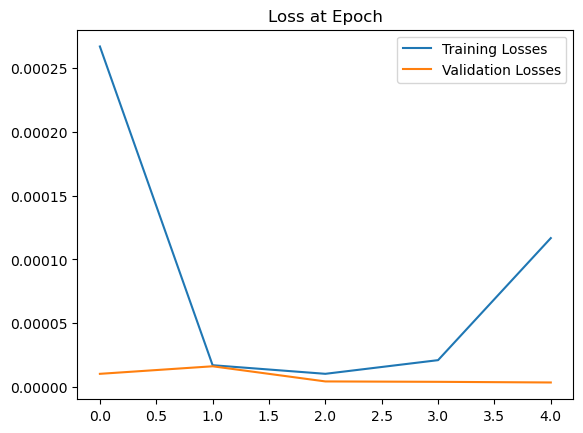

In [79]:
# Plot the loss at each epoch
plt.plot(train_losses, label="Training Losses")
plt.plot(test_losses, label="Validation Losses")
plt.title("Loss at Epoch")
plt.legend()
plt.show()

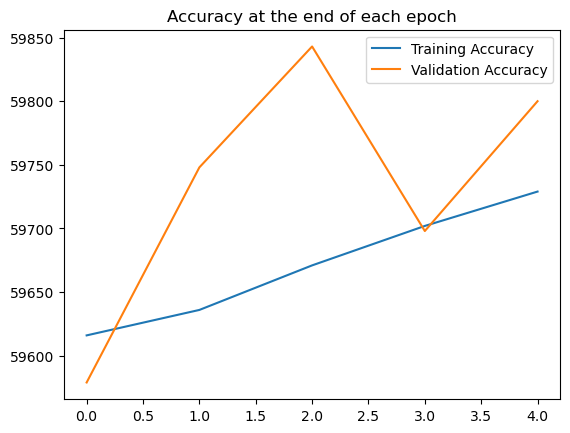

In [94]:
# Graph the accuracy at the end of each epoch
plt.plot([t for t in train_correct], label="Training Accuracy")
plt.plot([t for t in test_correct], label="Validation Accuracy")
plt.title("Accuracy at the end of each epoch")
plt.legend()
plt.show()

In [95]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [96]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_everything:
        y_val = model(X_test)
        predicted = torch.max(y_val, 1)[1]
        correct += (predicted == y_test).sum()

In [97]:
# Test for correctness
correct.item()/len(test_data) * 100

98.74000000000001

In [98]:
# Get an image and reshape it
test_data[4143][0].reshape(28, 28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

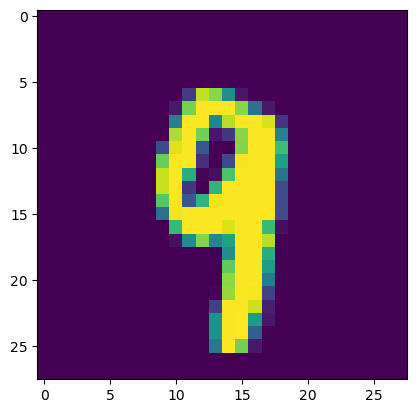

In [99]:
# Show the image
plt.imshow(test_data[4143][0].reshape(28, 28))
plt.show()

In [100]:
# Pass the image through our model
model.eval()
with torch.no_grad():
    new_prediction = model(test_data[4143][0].reshape(1, 1, 28, 28)) # batch size 1, 1 colour channel, 28x28 img

In [101]:
# Check the new prediction
new_prediction

tensor([[-2.7857e+01, -2.7193e+01, -2.9482e+01, -1.6292e+01, -1.4827e+01,
         -2.5457e+01, -4.0637e+01, -2.1428e+01, -1.7636e+01, -4.7684e-07]])

In [93]:
new_prediction.argmax()

tensor(9)

An output of 9 is given, which is correct shown in the image above.